In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xai3waM8J9zJBNreNjSx")
project = rf.workspace("ewuricedataset").project("rice-panicle-final")
version = project.version(1)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rice-Panicle-Final-1 in yolov11:: 100%|██████████| 4398/4398 [00:01<00:00, 4240.95it/s]


In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [3]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [4]:
!yolo task=detect mode=train model=yolo11s.pt data=/kaggle/working/Rice-Panicle-Final-1/data.yaml epochs=10 imgsz=640 plots=True


100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 169MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/Rice-Panicle-Final-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

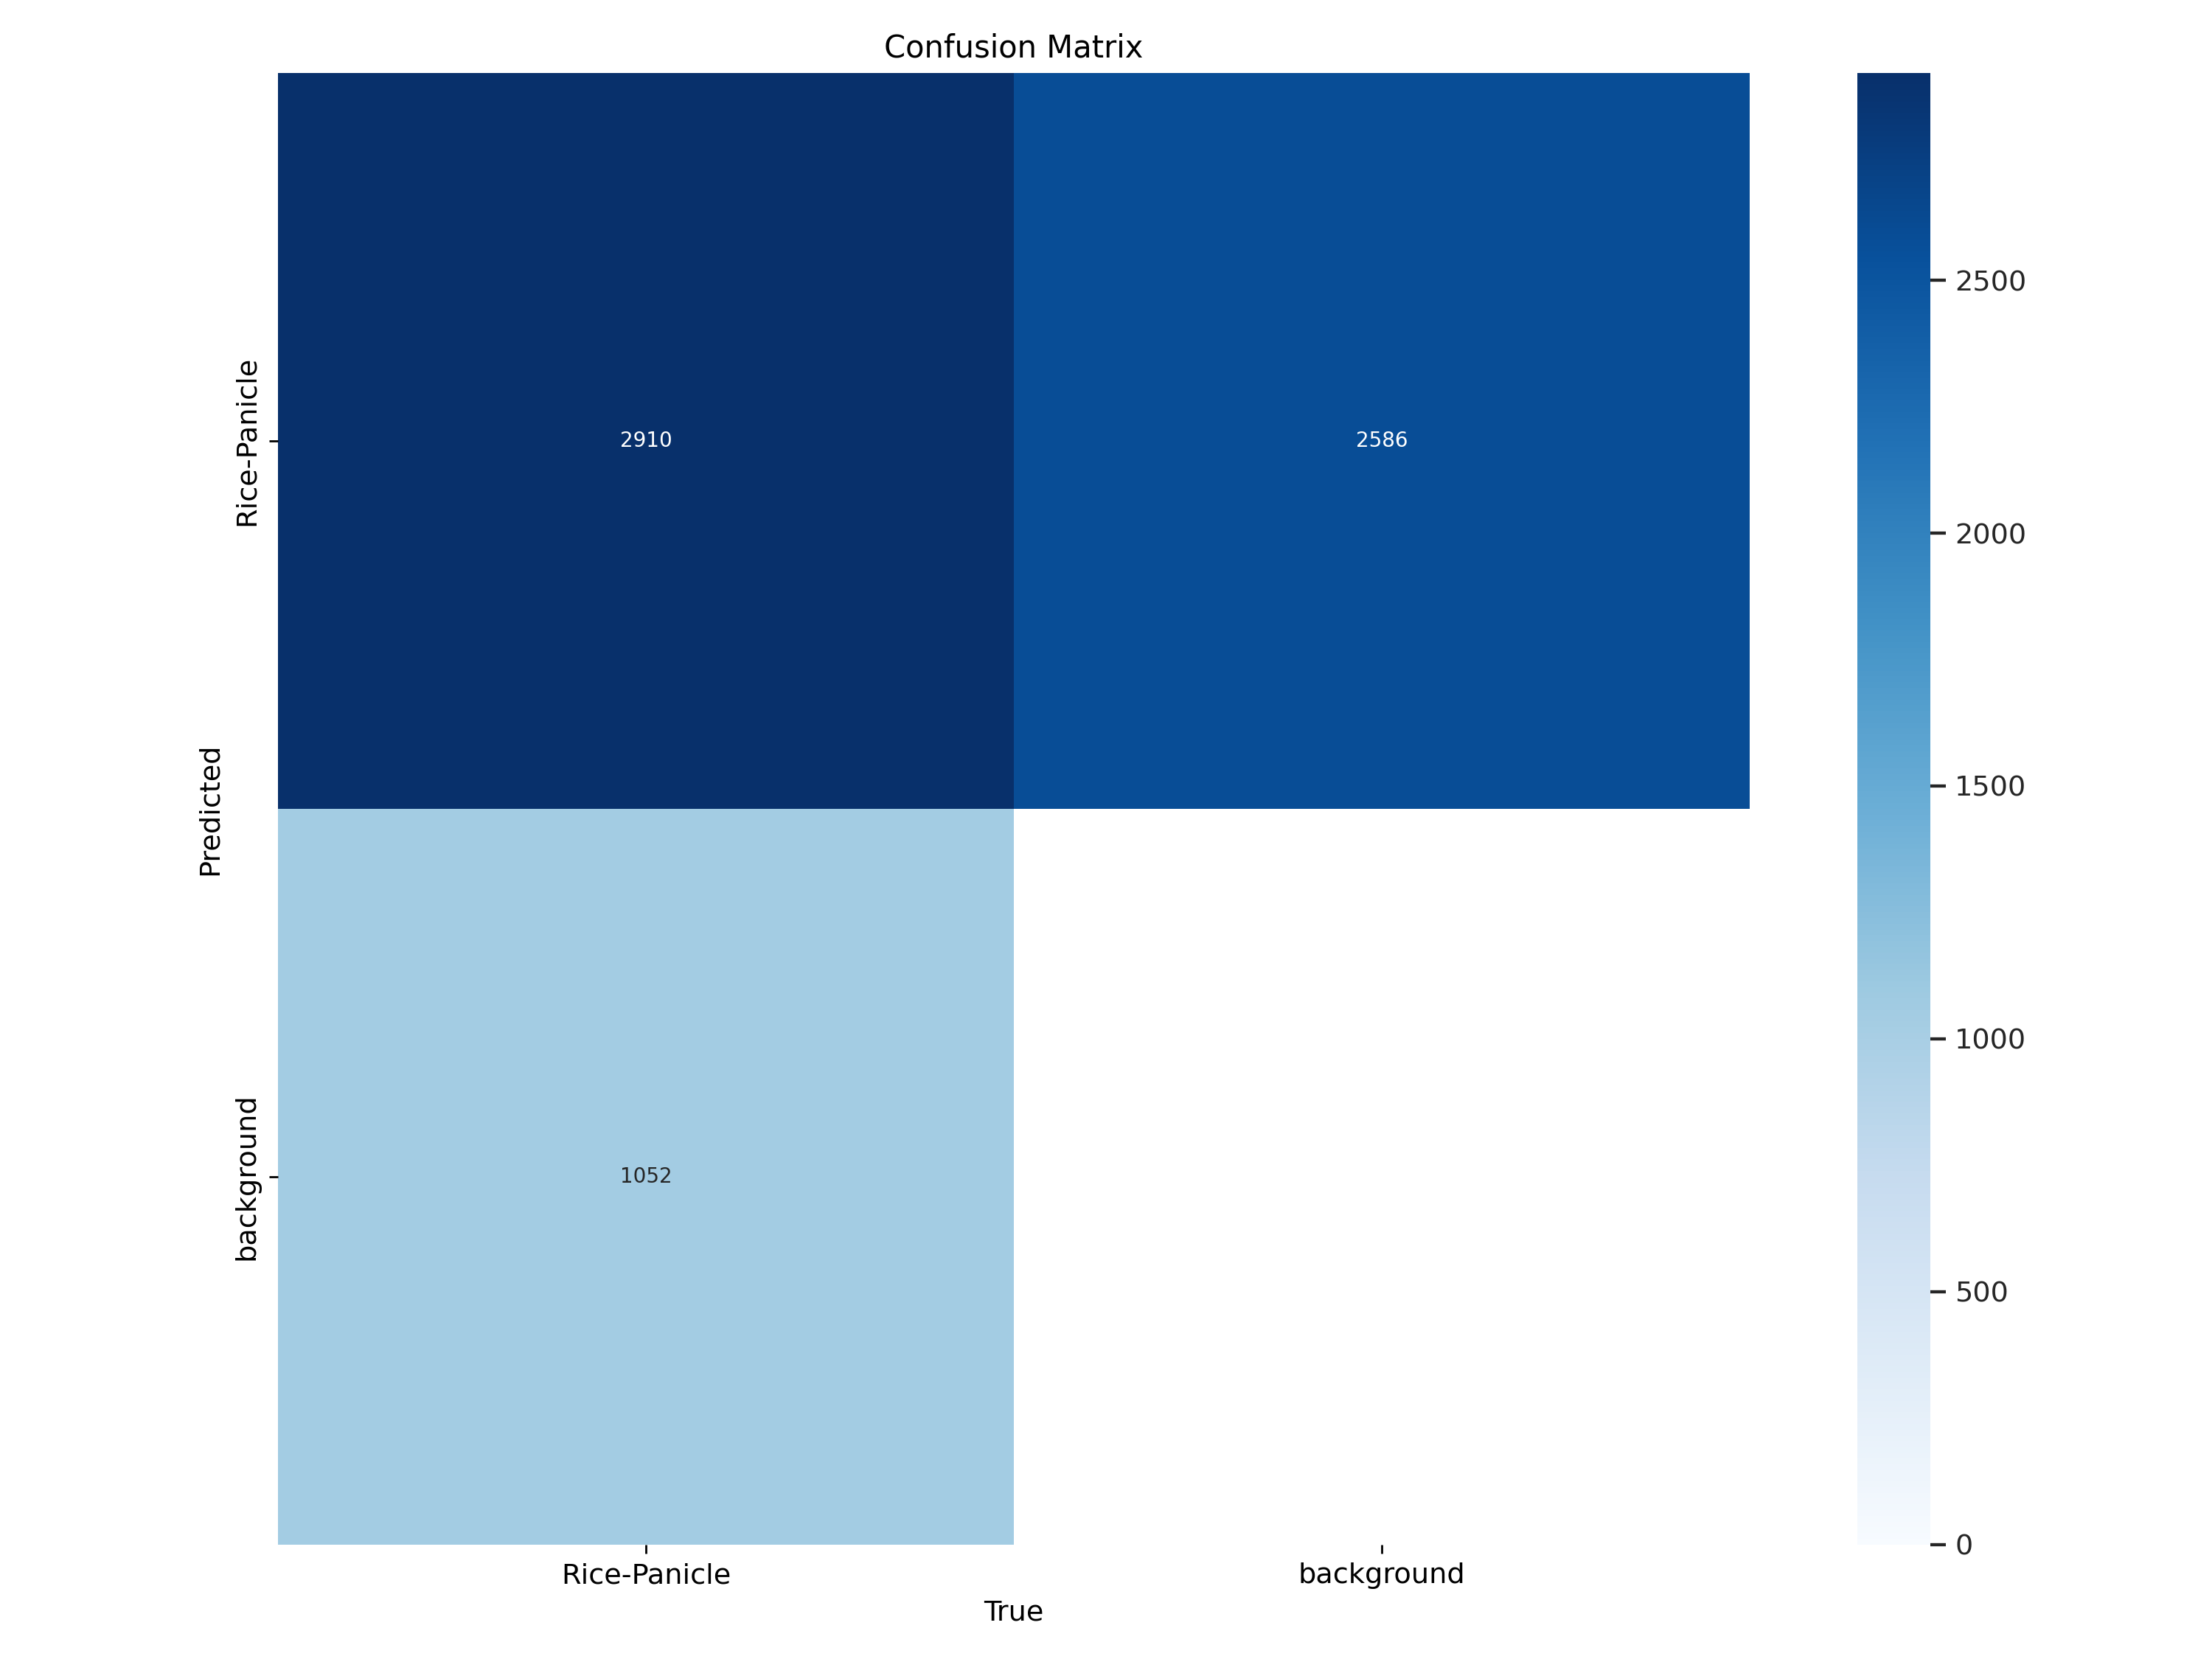

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

In [6]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/Rice-Panicle-Final-1/test/images save=True

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/220 /kaggle/working/Rice-Panicle-Final-1/test/images/004_split_3_0_jpg.rf.7aa9d207ca573dd43cbc13bd4568d393.jpg: 384x640 17 Rice-Panicles, 51.2ms
image 2/220 /kaggle/working/Rice-Panicle-Final-1/test/images/006_split_0_2_jpg.rf.dd9d1202dfedec07caa174adbf46a22f.jpg: 384x640 23 Rice-Panicles, 10.9ms
image 3/220 /kaggle/working/Rice-Panicle-Final-1/test/images/008_split_0_1_jpg.rf.58bce36d487d2d5ab729c49317706842.jpg: 384x640 26 Rice-Panicles, 10.8ms
image 4/220 /kaggle/working/Rice-Panicle-Final-1/test/images/011_split_2_1_jpg.rf.5b56a9eb6de8486c24b4c0dc27828638.jpg: 384x640 23 Rice-Panicles, 10.8ms
image 5/220 /kaggle/working/Rice-Panicle-Final-1/test/images/012_split_2_1_jpg.rf.caf30ab20f9d70b2631230ca9137062b.jpg: 384x640 27 Rice-Panicles, 10.8ms
image 6/220 /kaggle/working/Rice-Panicle-Final-1/test/images/013_split_1_3

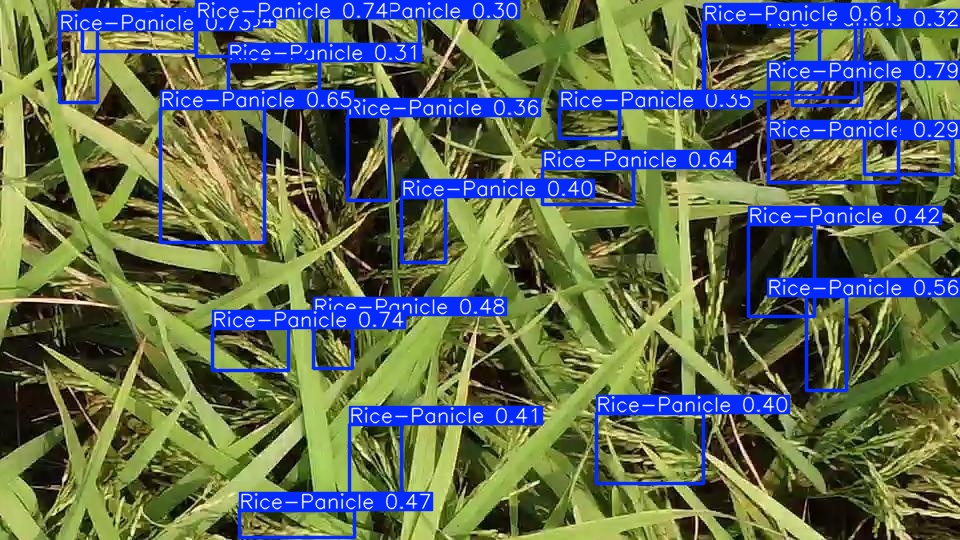

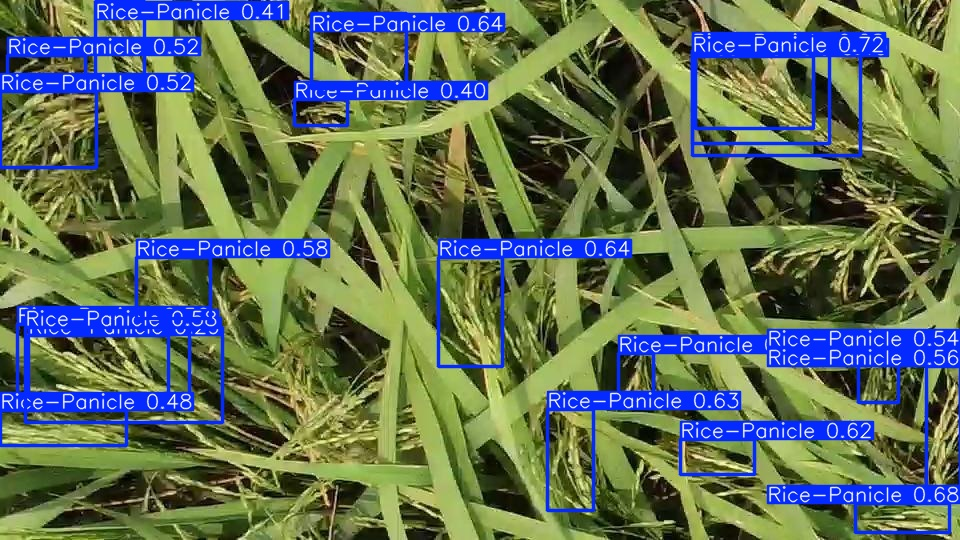

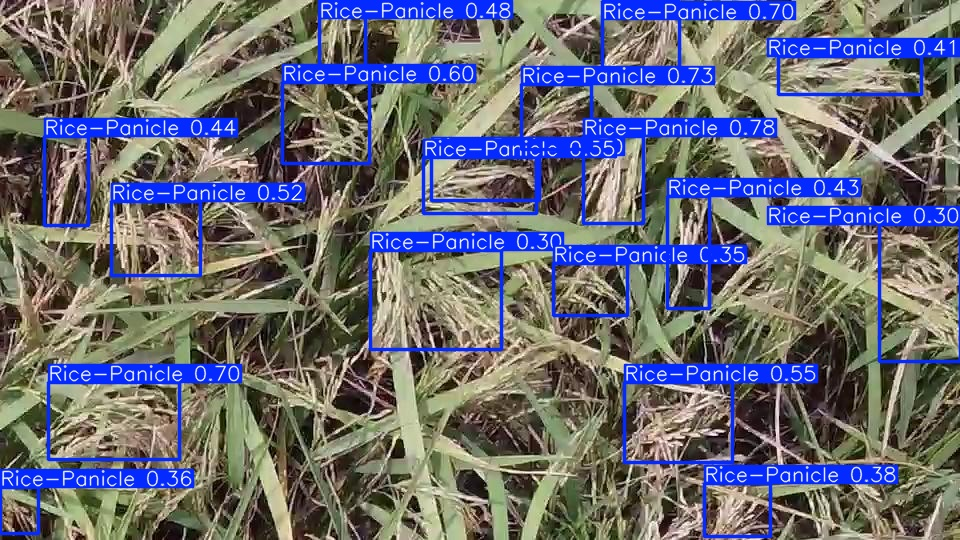

In [7]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
	display(IPyImage(filename=img, width=600))
	print("\n")

In [8]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 82 (delta 9), reused 14 (delta 5), pack-reused 57 (from 1)
Receiving objects: 100% (82/82), 29.78 MiB | 35.33 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [9]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [10]:
!ls

Rice-Panicle-Final-1  __notebook__.ipynb  yolo11n.pt
YOLO-V8-CAM	      runs		  yolo11s.pt


In [11]:
%cd /kaggle/working/YOLO-V8-CAM

/kaggle/working/YOLO-V8-CAM


In [12]:
!ls

 LICENSE.txt  'YOLO v8n EigenCAM.ipynb'   models
 README.md     images			  yolo_cam


In [13]:
!pip install ttach

In [14]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [15]:
img = cv2.imread('/kaggle/working/Rice-Panicle-Final-1/test/images/084_split_2_0_jpg.rf.9f326d055da577eb718958c4fd1e940d.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [16]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolo11n.pt') 
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [17]:
target_layers =[model.model.model[-2]]

In [18]:
cam = EigenCAM(model, target_layers,task='od')


0: 640x640 (no detections), 174.5ms
Speed: 4.9ms preprocess, 174.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


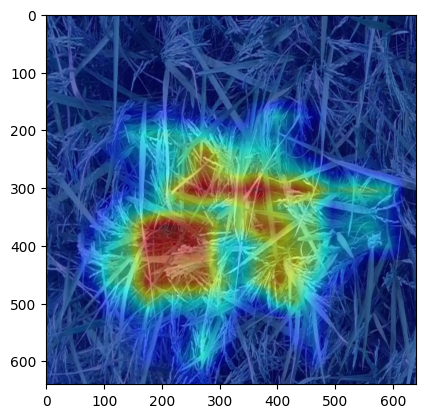

In [19]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 (no detections), 145.3ms
Speed: 2.8ms preprocess, 145.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


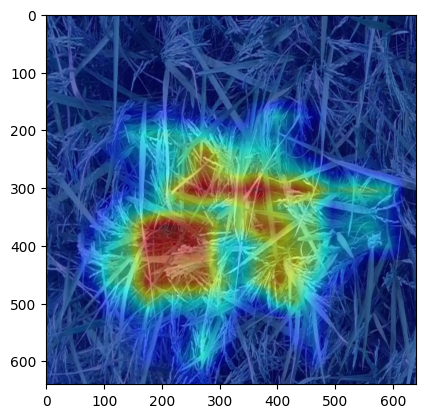

In [20]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [21]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 640x640 (no detections), 126.2ms
Speed: 2.9ms preprocess, 126.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


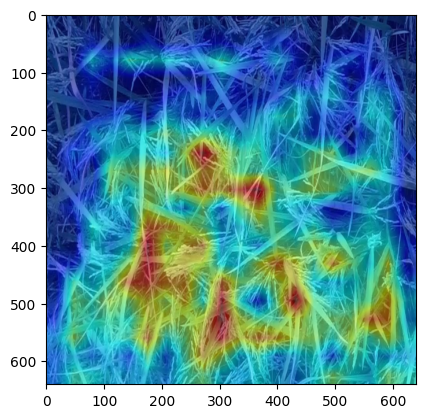

In [22]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

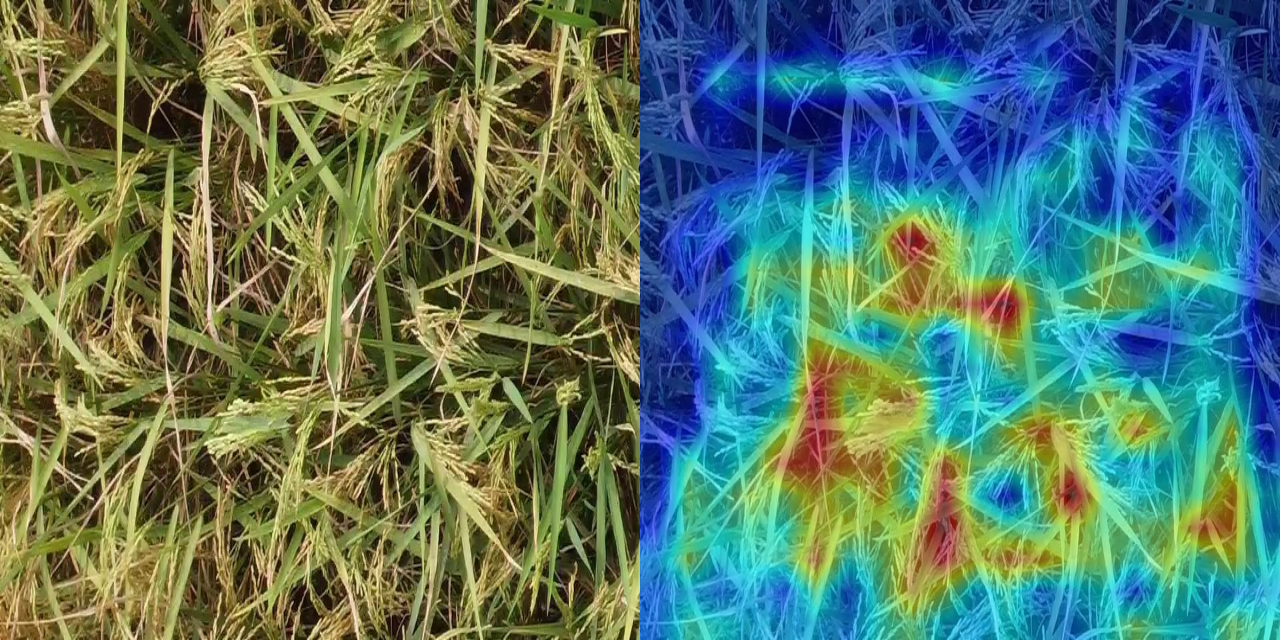

In [23]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))